In [1]:
#rdkit関連のimport
from rdkit import Chem
from rdkit.Chem import PandasTools

#randamforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#その他のimport
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import re

#データの規格化
def rescaling(features):
    norm_features = []
    max_value = max(features)
    min_value = min(features)
    for feature in features:
        norm_feature = (feature - min_value)/(max_value - min_value)
        norm_features.append(norm_feature)
    
    return norm_features

#SDFファイルの読み込み
mol_list  = Chem.SDMolSupplier("../../ForMolPredict/SDF_files/SOL/SOL_AllMOL.sdf",removeHs=False) 
mol_num = len(mol_list)
print("there are {} molecules".format(mol_num))

there are 1214 molecules


In [2]:
#データの抽出
SOL_class_list = [mol.GetProp('SOL_class') for mol in mol_list]
mol_props = ['Volume', 'Energy', 'HOMO', 'LUMO', 'HLgap', 'Mcharge_ave', 'Mcharge_var', 'Lcharge_ave', 'Lcharge_var', 'dipole', 'Atom_num', 'Mass', 'Density']
rdkit_fp = []
calc_list = []
for mol in mol_list:
    fp = [x for x in Chem.RDKFingerprint(mol)]
    rdkit_fp.append(fp)
    mol_data = [mol.GetDoubleProp(prop) for prop in mol_props]
    calc_list.append(mol_data)
FP_df = pd.DataFrame(rdkit_fp)
Calc_df = pd.DataFrame(calc_list, columns=mol_props)
FC_df = pd.concat([Calc_df, FP_df], axis=1 )

In [3]:
#Rescaling
resc_list = []
for prop_name, prop_data in Calc_df.iteritems():
    resc_list.append(rescaling(prop_data))
rescCalc_df = pd.DataFrame(resc_list, index=mol_props)
rescCalc_df = rescCalc_df.T
rescFC_df = pd.concat([rescCalc_df, FP_df], axis=1 )

In [4]:
print('number of Fingerprint:',len(FP_df.columns))
print('number of Calclation Data:', len(Calc_df.columns))
print('number of All Data:', len(FC_df.columns))
print('number of Rescaled Calclation Data:', len(rescCalc_df.columns))
print('number of Rescaled All Data:', len(rescFC_df.columns))

number of Fingerprint: 2048
number of Calclation Data: 13
number of All Data: 2061
number of Rescaled Calclation Data: 13
number of Rescaled All Data: 2061


In [5]:
#activityのカウント
print('number of (A) low: ',SOL_class_list.count('(A) low'))
print('number of (B) medium: ',SOL_class_list.count('(B) medium'))
print('number of (C) high: ',SOL_class_list.count('(C) high'))

number of (A) low:  484
number of (B) medium:  491
number of (C) high:  239


In [6]:
#Only Rdkit Finger Print
X_train, X_test, y_train, y_test = train_test_split(FP_df, SOL_class_list, random_state=0)#test_size=0.25(default)
forest = RandomForestClassifier(max_depth=100, n_estimators=500, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test) #予測値算出
print('=======Only Rdkit Finger Print========')
print('train accuracy: {:.3f}'.format(forest.score(X_train, y_train)))
print('accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
#Only Calculation Results
X2_train, X2_test, y2_train, y2_test = train_test_split(Calc_df, SOL_class_list, random_state=0)
forest2 = RandomForestClassifier(max_depth=100, n_estimators=500, random_state=0)
forest2.fit(X2_train, y2_train)
y2_pred = forest2.predict(X2_test) #予測値算出
print('=======Only Calculation Results========')
print('train accuracy: {:.3f}'.format(forest2.score(X2_train, y2_train)))
print('accuracy: {:.3f}'.format(accuracy_score(y2_test, y2_pred)))
#Calculation Results + Rdkit Finger Print
X3_train, X3_test, y3_train, y3_test = train_test_split(FC_df, SOL_class_list, random_state=0)
forest3 = RandomForestClassifier(max_depth=100, n_estimators=500, random_state=0)
forest3.fit(X3_train, y3_train)
y3_pred = forest3.predict(X3_test) #予測値算出
print('=======Calculation Results + Rdkit Finger Print========')
print('train accuracy: {:.3f}'.format(forest3.score(X3_train, y3_train)))
print('test accuracy: {:.3f}'.format(accuracy_score(y3_test, y3_pred)))
print('/////////////Rescaled Results//////////////')
#Only Calculation Results
X4_train, X4_test, y4_train, y4_test = train_test_split(rescCalc_df, SOL_class_list, random_state=0)
forest4 = RandomForestClassifier(max_depth=100, n_estimators=500, random_state=0)
forest4.fit(X4_train, y4_train)
y4_pred = forest4.predict(X4_test) #予測値算出
print('=======Only Calculation Results========')
print('train accuracy: {:.3f}'.format(forest4.score(X4_train, y4_train)))
print('test accuracy: {:.3f}'.format(accuracy_score(y4_test, y4_pred)))
#Calculation Results + Rdkit Finger Print
X5_train, X5_test, y5_train, y5_test = train_test_split(rescFC_df, SOL_class_list, random_state=0)
forest5 = RandomForestClassifier(max_depth=100, n_estimators=500, random_state=0)
forest5.fit(X5_train, y5_train)
y5_pred = forest3.predict(X5_test) #予測値算出
print('=======Calculation Results + Rdkit Finger Print========')
print('train accuracy: {:.3f}'.format(forest5.score(X5_train, y5_train)))
print('test accuracy: {:.3f}'.format(accuracy_score(y5_test, y5_pred)))

=======Only Rdkit Finger Print========
train accuracy: 0.995
accuracy: 0.734
=======Only Calculation Results========
train accuracy: 1.000
accuracy: 0.819
=======Calculation Results + Rdkit Finger Print========
train accuracy: 1.000
test accuracy: 0.766
/////////////Rescaled Results//////////////
=======Only Calculation Results========
train accuracy: 1.000
test accuracy: 0.819
=======Calculation Results + Rdkit Finger Print========
train accuracy: 1.000
test accuracy: 0.714


In [7]:
#activityごとの評価
print('=======Only Rdkit Finger Print========')
print(classification_report(y_test,y_pred))
print('=======Only Calculation Results========')
print(classification_report(y2_test,y2_pred))
print('=======Calculation Results + Rdkit Finger Print========')
print(classification_report(y3_test,y3_pred))
print('/////////////Rescaled Results//////////////')
print('=======Only Calculation Results========')
print(classification_report(y4_test,y4_pred))
print('=======Calculation Results + Rdkit Finger Print========')
print(classification_report(y5_test,y5_pred))

=======Only Rdkit Finger Print========
              precision    recall  f1-score   support

     (A) low       0.72      0.86      0.78       118
  (B) medium       0.74      0.64      0.69       134
    (C) high       0.78      0.67      0.72        52

    accuracy                           0.73       304
   macro avg       0.74      0.73      0.73       304
weighted avg       0.74      0.73      0.73       304

=======Only Calculation Results========
              precision    recall  f1-score   support

     (A) low       0.82      0.87      0.85       118
  (B) medium       0.80      0.80      0.80       134
    (C) high       0.87      0.75      0.80        52

    accuracy                           0.82       304
   macro avg       0.83      0.81      0.82       304
weighted avg       0.82      0.82      0.82       304

=======Calculation Results + Rdkit Finger Print========
              precision    recall  f1-score   support

     (A) low       0.77      0.87      0.82     

=======Only Rdkit Finger Print========


Text(91.68, 0.5, 'true value')

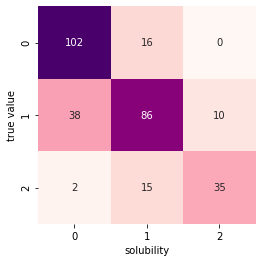

In [8]:
#confusion matrix
print('=======Only Rdkit Finger Print========')
matrix_fp = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_fp, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('solubility')
plt.ylabel('true value')

=======Only Calculation Results========


Text(91.68, 0.5, 'true value')

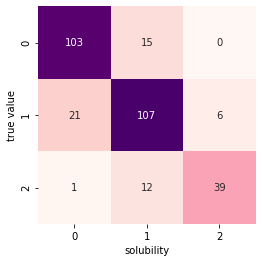

In [9]:
#confusion matrix
print('=======Only Calculation Results========')
matrix_calc = confusion_matrix(y2_test, y2_pred)
sns.heatmap(matrix_calc, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('solubility')
plt.ylabel('true value')

=======Calculation Results + Rdkit Finger Print========


Text(91.68, 0.5, 'true value')

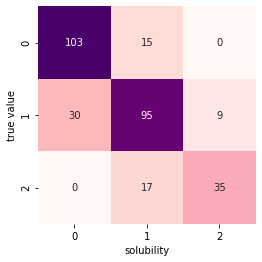

In [10]:
#confusion matrix
print('=======Calculation Results + Rdkit Finger Print========')
matrix_FC = confusion_matrix(y3_test, y3_pred)
sns.heatmap(matrix_FC, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('solubility')
plt.ylabel('true value')

=======Only Rescaled Calculation Results========


Text(91.68, 0.5, 'true value')

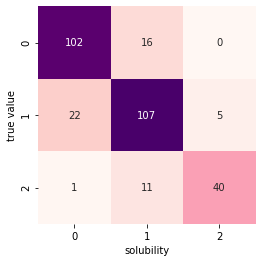

In [11]:
#confusion matrix
print('=======Only Rescaled Calculation Results========')
matrix_calc = confusion_matrix(y4_test, y4_pred)
sns.heatmap(matrix_calc, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('solubility')
plt.ylabel('true value')

=======Rescaled Calculation Results + Rdkit Finger Print========


Text(91.68, 0.5, 'true value')

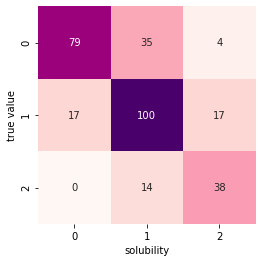

In [12]:
#confusion matrix
print('=======Rescaled Calculation Results + Rdkit Finger Print========')
matrix_FC = confusion_matrix(y5_test, y5_pred)
sns.heatmap(matrix_FC, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('solubility')
plt.ylabel('true value')

In [13]:
# Feature Importance
fti = forest.feature_importances_  
fti2 = forest2.feature_importances_  
fti3 = forest3.feature_importances_  
fti4 = forest4.feature_importances_  
fti5 = forest5.feature_importances_ 
fti_df = pd.DataFrame(fti, columns = ['importance'])
fti_Calc_index = mol_props
fti_FC_index = mol_props+list(fti_df.index)
fti2_df = pd.DataFrame(fti2, columns =  ['importance'], index = fti_Calc_index)
fti3_df = pd.DataFrame(fti3, columns =  ['importance'], index = fti_FC_index)
fti4_df = pd.DataFrame(fti4, columns =  ['importance'], index = fti_Calc_index)
fti5_df = pd.DataFrame(fti5, columns =  ['importance'], index = fti_FC_index)
#sort
fti_df = fti_df.sort_values("importance", ascending=False)
fti2_df = fti2_df.sort_values("importance", ascending=False)
fti3_df = fti3_df.sort_values("importance", ascending=False)
fti4_df = fti4_df.sort_values("importance", ascending=False)
fti5_df = fti5_df.sort_values("importance", ascending=False)

=======Only Rdkit Finger Print========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

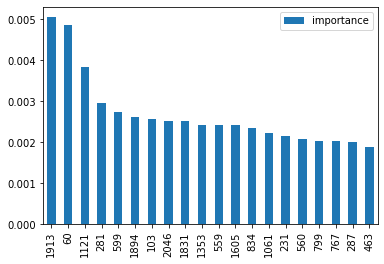

In [14]:
print('=======Only Rdkit Finger Print========')
plt.figure()
fti_df[:20].plot.bar() #Top20

=======Only Calculation Results========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

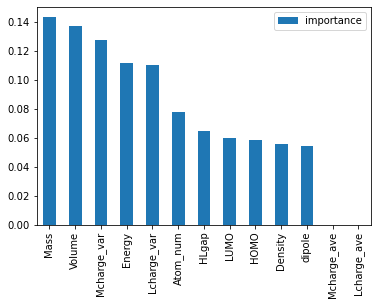

In [15]:
print('=======Only Calculation Results========')
plt.figure()
fti2_df[:20].plot.bar() #Top20

=======Calculation Results + Rdkit Finger Print========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

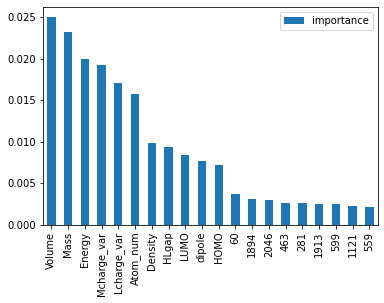

In [16]:
print('=======Calculation Results + Rdkit Finger Print========')
plt.figure()
fti3_df[:20].plot.bar() #Top20

=======Only Rescaled Calculation Results========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

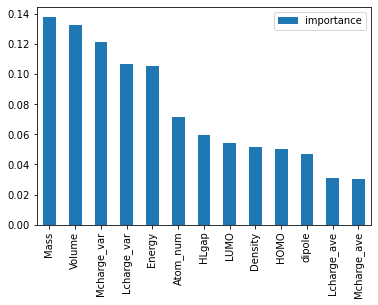

In [17]:
print('=======Only Rescaled Calculation Results========')
plt.figure()
fti4_df[:20].plot.bar() #Top20

=======Rescaled Calculation Results + Rdkit Finger Print========


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

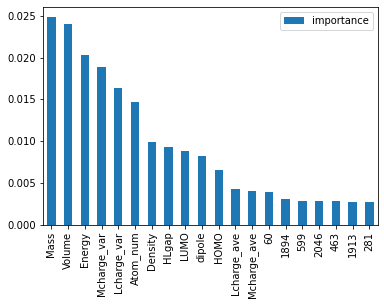

In [18]:
print('=======Rescaled Calculation Results + Rdkit Finger Print========')
plt.figure()
fti5_df[:20].plot.bar() #Top20